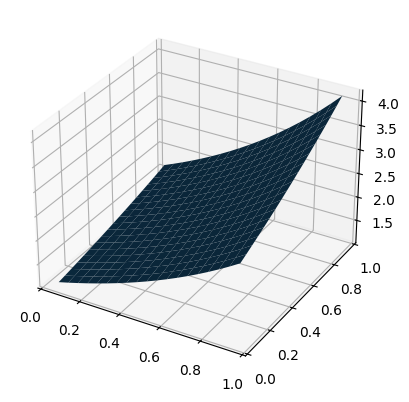

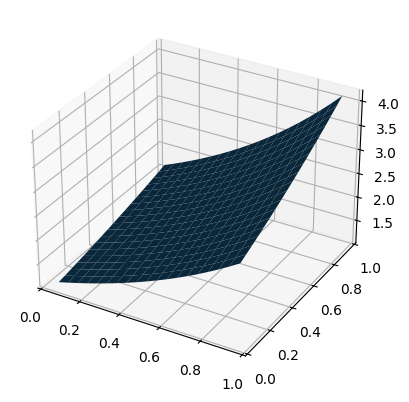

3.601927853447151e-05


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Lx=1
a=0
b=1

Ly=1.0
c=0
d=1


Nx=19
Ny=19

hx=(b-a)/(Nx+1)
hy=(d-c)/(Ny+1)

x=np.linspace(a,b,Nx+2)
y=np.linspace(c,d,Ny+2)

xi=x[1:-1]
yi=y[1:-1]

Yi, Xi = np.meshgrid(yi, xi)


f = lambda x1,y1: 1.25*np.exp(x1+y1/2)#-np.pi**2*(1./Lx**2+1./Ly**2) * np.sin(np.pi * x1 / Lx) * np.sin(np.pi * y1 / Ly)


true_solution= lambda x1,y1: np.exp(x1+y1/2)

u1=true_solution(a,yi)
u2=true_solution(b,yi)
u3=true_solution(xi,c)
u4=true_solution(xi,d)

main_diag = -2 * np.ones(Nx )
off_diag = np.ones(Nx - 1)
Ax = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
Ax *= 1/ hx**2


main_diag = -2 * np.ones(Ny )
off_diag = np.ones(Ny - 1)
Ay = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
Ay *= 1/ hy**2

A = np.kron(np.identity(Ny),Ax)+np.kron(Ay,np.identity(Nx))

B = f(Xi,Yi)

B[0,:] -= u1 / hx**2
B[-1,:] -= u2 / hx**2
B[:,0] -= u3 / hy**2
B[:,-1] -= u4 / hy**2
B=B.transpose()
rhs = B.reshape((Nx)*(Ny))

u_internal = np.linalg.solve(A, rhs)
u=u_internal.transpose()
U1 = u.reshape((Ny, Nx))
U=U1.transpose()
ax = plt.axes(projection ='3d')

ax.plot_surface(Xi, Yi, U)

plt.show()

ax = plt.axes(projection ='3d')

ax.plot_surface(Xi, Yi, true_solution(Xi,Yi))

plt.show()

print(np.max(np.abs(U-true_solution(Xi,Yi))))